(1). Installing all the necessary modules:

In [1]:
#pip install scikit-learn


In [2]:
#pip install scikit-image

(2). Importing all the necessary modules:

In [3]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

(3). Loading and seeing the dataset details:

In [4]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('/content/yelp.csv')

In [5]:
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())

Few dataset entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiob

In [6]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(10000, 10)


In [7]:
# COLUMN NAMES
print("Column names:")
print(data.columns)

Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [9]:
# CONCISE SUMMARY OF DATASET
data.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [10]:
# DESCRIPTIVE STATISTICS OF DATASET
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [11]:
# CHECKING FOR NULL VALUES
data.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

(4). Analysis of dataset for feature extraction

In [12]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [13]:
#TOTAL REVIEW COUNT 
data['stars'].count()

10000

In [14]:
# UNIQUE STARS RATING
data.stars.unique()

array([5, 4, 2, 3, 1])

In [15]:
# INDIVIDUAL STARS COUNT
data["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [16]:
# FINDING COUNT OF UNIQUE USERS IN THE DATASET
data.user_id.unique()

array(['rLtl8ZkDX5vH5nAx9C3q5Q', '0a2KyEL0d3Yb1V6aivbIuQ',
       '0hT2KtfLiobPvh6cDC8JQg', ..., 'gGbN1aKQHMgfQZkqlsuwzg',
       '0lyVoNazXa20WzUyZPLaQQ', 'KSBFytcdjPKZgXKQnYQdkA'], dtype=object)

In [17]:
data_user = data["user_id"]
data_user

0       rLtl8ZkDX5vH5nAx9C3q5Q
1       0a2KyEL0d3Yb1V6aivbIuQ
2       0hT2KtfLiobPvh6cDC8JQg
3       uZetl9T0NcROGOyFfughhg
4       vYmM4KTsC8ZfQBg-j5MWkw
                 ...          
9995    _eqQoPtQ3e3UxLE4faT6ow
9996    ROru4uk5SaYc3rg8IU7SQw
9997    gGbN1aKQHMgfQZkqlsuwzg
9998    0lyVoNazXa20WzUyZPLaQQ
9999    KSBFytcdjPKZgXKQnYQdkA
Name: user_id, Length: 10000, dtype: object

In [18]:
data_user.describe()

count                      10000
unique                      6403
top       fczQCSmaWF78toLEmb0Zsw
freq                          38
Name: user_id, dtype: object

In [19]:
data["user_id"].value_counts()

fczQCSmaWF78toLEmb0Zsw    38
0CMz8YaO3f8xu4KqQgKb9Q    25
90a6z--_CUrl84aCzZyPsg    22
0mqHhdKEdak_A1FBhFNXqA    18
4ozupHULqGyO42s3zNUzOQ    18
                          ..
3FvZLg19icrnprA_PzSr9Q     1
67QGJdqABqaSEsQR4esrsA     1
-yaUMGgbVm1iOG_j8CmBtA     1
ebCOe-Bavz5fYCVL716KIA     1
KSBFytcdjPKZgXKQnYQdkA     1
Name: user_id, Length: 6403, dtype: int64

In [20]:
# Finding TOP 10 USERS IN THE DATASET
user_agg=data.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [21]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("                                     Top 10 Users in Yelp")
user_agg.head(10)

                                     Top 10 Users in Yelp


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
user_id                                                                      
fczQCSmaWF78toLEmb0Zsw        38  2007-12-14  2012-07-19    293   147  263   
0CMz8YaO3f8xu4KqQgKb9Q        25  2007-01-22  2007-07-20     45    34   44   
90a6z--_CUrl84aCzZyPsg        22  2008-02-27  2012-07-23     59    22   44   
4ozupHULqGyO42s3zNUzOQ        18  2010-06-26  2012-12-10    130    59   97   
0mqHhdKEdak_A1FBhFNXqA        18  2010-04-19  2012-10-19     12    11    2   
wHg1YkCzdZq9WBJOTRgxHQ        17  2008-06-13  2012-02-01    100    79   89   
0bNXP9quoJEgyVZu9ipGgQ        16  2008-12-05  2012-04-28    115    58   88   
_PzSNcfrCjeBxSLXRoMmgQ        16  2009-11-11  2013-01-04     23    13   17   
JgDkCER12uiv4lbpmkZ9VA        15  2008-05-27  2011-01-29     30    15   15   
joIzw_aUiNvBTuGoytrH7g        15  2009-03-29  2012-01-12     34    18   22   

                           stars  
                            mean  
user_id                           
fczQCSmaWF78toLEmb0Zsw  4.131579  
0CMz8YaO3f8xu4KqQgKb9Q  4.120000  
90a6z--_CUrl84aCzZyPsg  3.954545  
4ozupHULqGyO42s3zNUzOQ  4.388889  
0mqHhdKEdak_A1FBhFNXqA  3.055556  
wHg1YkCzdZq9WBJOTRgxHQ  3.823529  
0bNXP9quoJEgyVZu9ipGgQ  2.875000  
_PzSNcfrCjeBxSLXRoMmgQ  3.750000  
JgDkCER12uiv4lbpmkZ9VA  2.933333  
joIzw_aUiNvBTuGoytrH7g  2.933333

(5). Visualization:

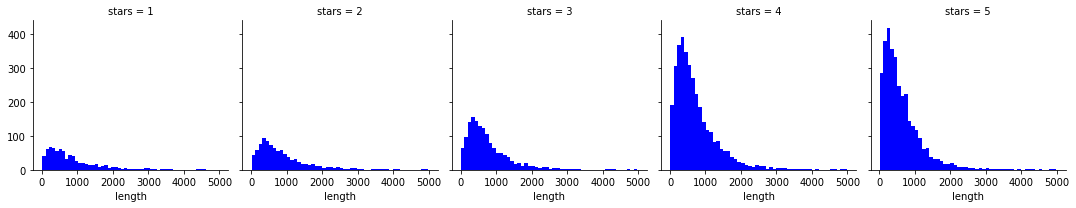

In [22]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

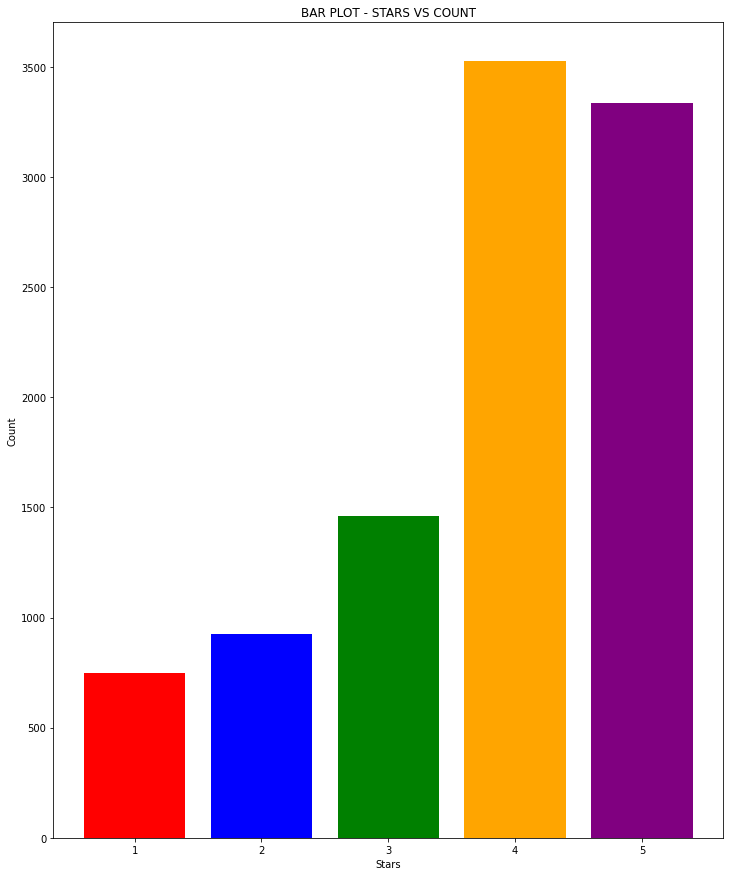

In [23]:
# BAR PLOT - STARS VS COUNT
x = [ 1, 2, 3, 4, 5]
y = [ 749, 927, 1461, 3526, 3337]
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(12, 15))

plt.bar(x, y, color=colors)

# ADDING LABLES AND TITLES
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('BAR PLOT - STARS VS COUNT')

plt.show()


<Figure size 1080x864 with 0 Axes>

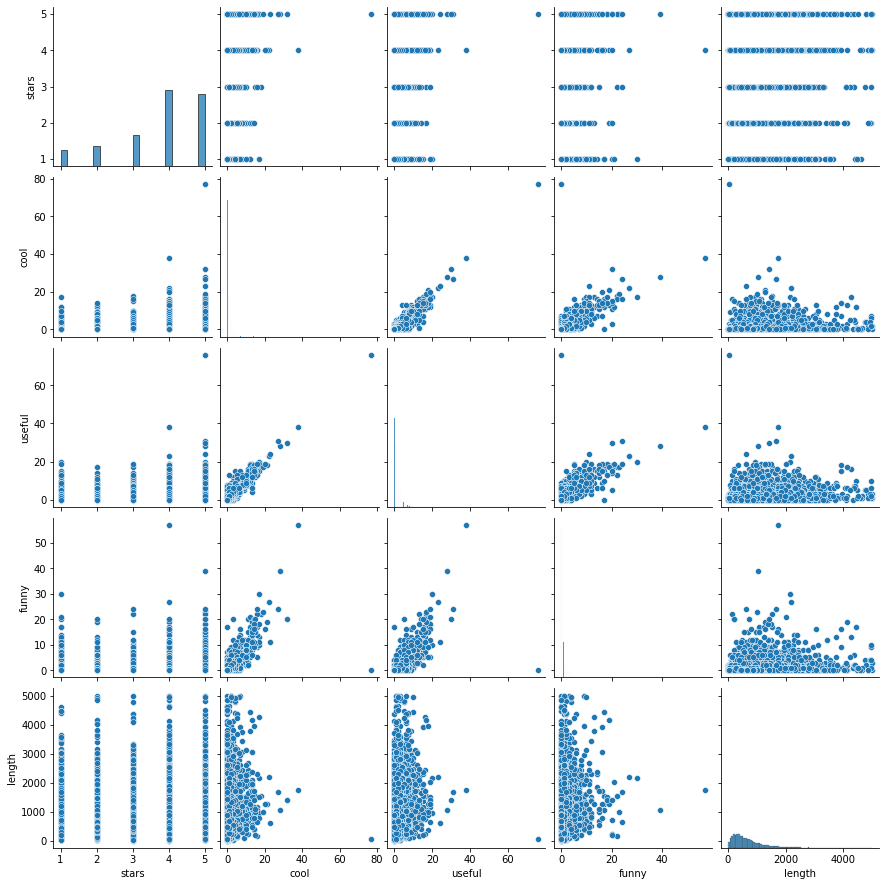

In [24]:
# PAIRPLOT FOR THE WHOLE DATASET
plt.figure(figsize=(15, 12))
sns.pairplot(data)

Text(0.5, 1.0, 'AVG RATINGS VS YEAR')

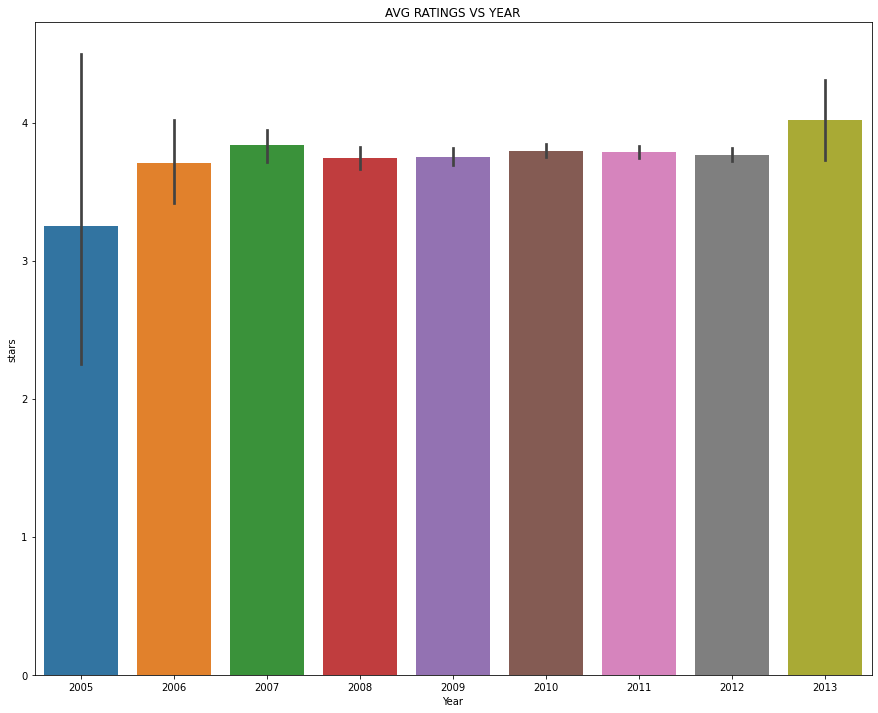

In [25]:
# BAR PLOT - AVG RATINGS VS YEAR

data["date"]= pd.to_datetime(data["date"]).dt.date
data.set_index('date').head(1)
data["Year"] = pd.to_datetime(data["date"]).dt.year
plt.figure(figsize=(15, 12))
sns.barplot(x=data["Year"], y=data["stars"], data=data,)
plt.title("AVG RATINGS VS YEAR")

Text(0.5, 1.0, 'AVG RATINGS VS MONTH')

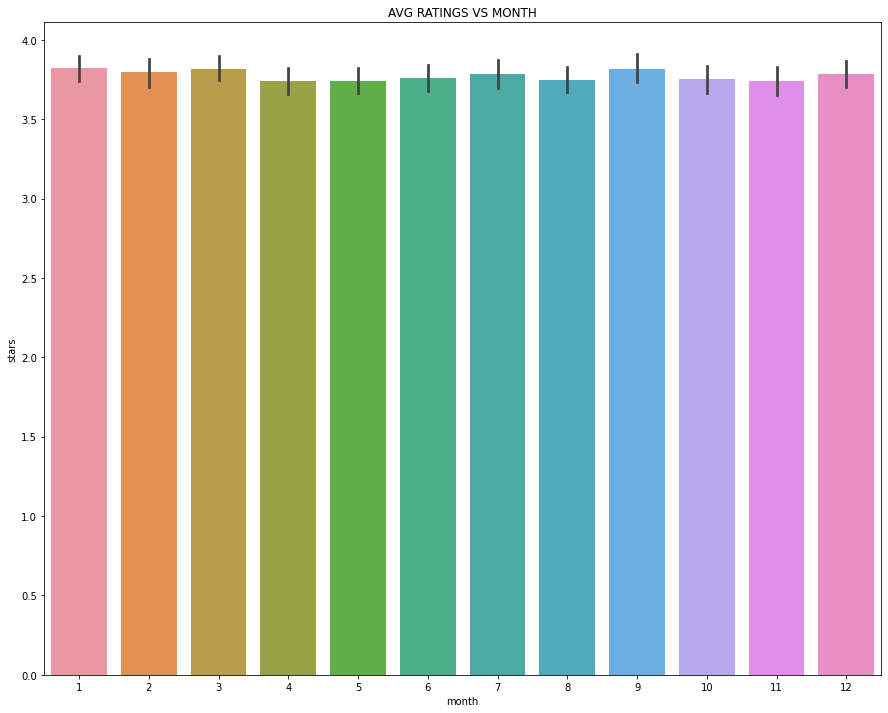

In [26]:
# BAR PLOT - AVG RATINGS VS MONTH

data["date"]= pd.to_datetime(data["date"]).dt.date
data.set_index('date').head(1)
data["month"] = pd.to_datetime(data["date"]).dt.month
plt.figure(figsize=(15, 12))
sns.barplot(x=data["month"], y=data["stars"], data=data)
plt.title("AVG RATINGS VS MONTH")

Text(0.5, 1.0, 'AVG WORDS VS STARS')

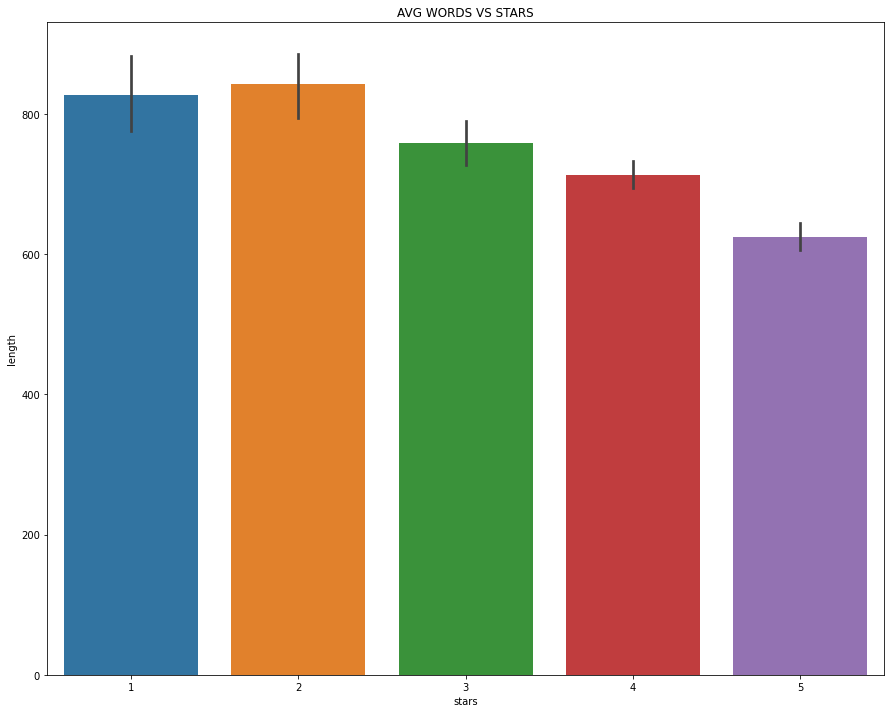

In [27]:
# BAR PLOT - AVG WORDS VS STARS
plt.figure(figsize=(15, 12))
sns.barplot(x=data["stars"], y=data["length"], data=data)
plt.title("AVG WORDS VS STARS")

(6). Mean Value of the Vote columns

In [28]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars').mean()
stval

,cool,useful,funny,length,Year,month
stars,,,,,,
1,0.576769,1.604806,1.056075,826.515354,2010.830441,6.671562
2,0.719525,1.563107,0.875944,842.256742,2010.463862,6.373247
3,0.788501,1.306639,0.694730,758.498289,2010.366872,6.514716
4,0.954623,1.395916,0.670448,712.923142,2010.411798,6.240783
5,0.944261,1.381780,0.608631,624.999101,2010.647588,6.491160


(7). Correlation between the voting columns:

In [29]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
corr = stval.corr()
corr

,cool,useful,funny,length,Year,month
cool,1.000000,-0.743329,-0.944939,-0.857664,-0.498188,-0.684644
useful,-0.743329,1.000000,0.894506,0.699881,0.619854,0.301822
funny,-0.944939,0.894506,1.000000,0.843461,0.590746,0.542146
length,-0.857664,0.699881,0.843461,1.000000,0.072901,0.225594
Year,-0.498188,0.619854,0.590746,0.072901,1.000000,0.724853
month,-0.684644,0.301822,0.542146,0.225594,0.724853,1.000000


<AxesSubplot:>

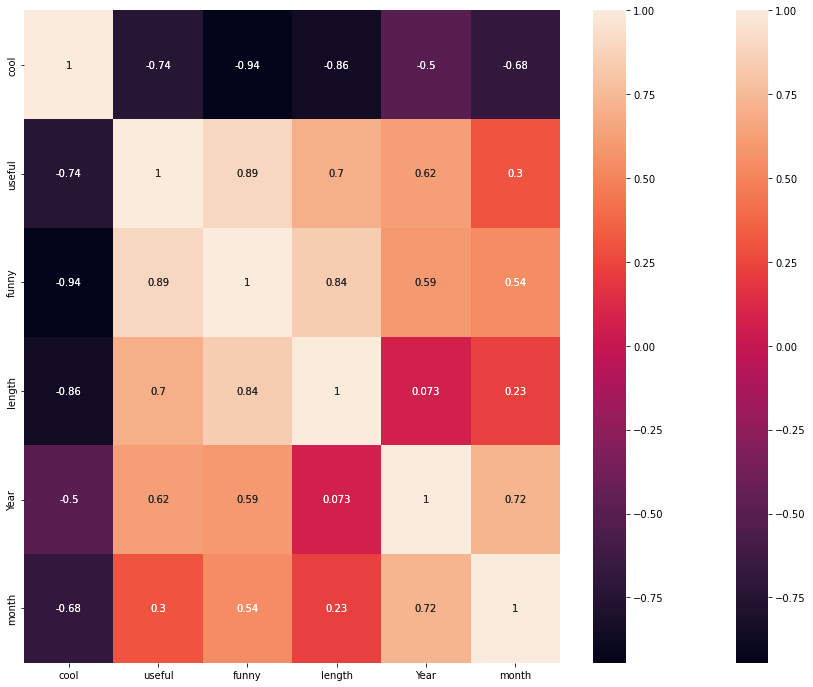

In [30]:
# HEAT MAP
plt.figure(figsize=(15, 12))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  <br>
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

(8). Classifying the dataset and splitting it into the reviews and stars:

In [31]:
# CLASSIFICATION
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,Year,month
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,2011,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,2011,7
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,2010,5
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,2012,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565,2010,2


In [32]:
print(data_classes.shape)

(5547, 13)


In [33]:
# Seperate the dataset into X and Y for prediction

x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


(9). Data Cleaning:

In [34]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

(10). Vectorization

In [35]:
#python -m nltk.downloader stopwords

import nltk  
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names_out()[19648])
print(vocab.get_feature_names_out()[10643])

31336
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8

(11). Vectorization of the whole review set and and checking the sparse matrix:

In [37]:
x = vocab.transform(x)
# Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


(12). Splitting the dataset X into training and testing set:

In [38]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

(13). Modelling:

In [39]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:               precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 33  27 102]
 [  1 107 184]
 [  2  20 634]]
Score: 69.73
Classification Report:               precision    recall  f1-score   support

           1       0.92      0.20      0.33       162
           3       0.69      0.37      0.48       292
           5       0.69      0.97      0.80       656

    accuracy                           0.70      1110
   macro avg       0.77      0.51      0.54      1110
weighted avg       0.72      0.70      0.65      1110



In [41]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 61  53  48]
 [ 33 143 116]
 [ 35 104 517]]
Score: 64.95
Classification Report:               precision    recall  f1-score   support

           1       0.47      0.38      0.42       162
           3       0.48      0.49      0.48       292
           5       0.76      0.79      0.77       656

    accuracy                           0.65      1110
   macro avg       0.57      0.55      0.56      1110
weighted avg       0.64      0.65      0.65      1110



In [42]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 31  23 108]
 [  5 122 165]
 [  1  19 636]]
Score: 71.08
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.19      0.31       162
           3       0.74      0.42      0.54       292
           5       0.70      0.97      0.81       656

    accuracy                           0.71      1110
   macro avg       0.76      0.53      0.55      1110
weighted avg       0.73      0.71      0.67      1110



In [43]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score:  61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



In [44]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 91  37  34]
 [ 23 182  87]
 [ 15  57 584]]
Score: 77.21
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.63       162
           3       0.66      0.62      0.64       292
           5       0.83      0.89      0.86       656

    accuracy                           0.77      1110
   macro avg       0.73      0.69      0.71      1110
weighted avg       0.77      0.77      0.77      1110



* Multilayer Perceptron = 77.21%
* Multinomial Naive Bayes = 76.94%
* Random Forest Classifier = 69.73%
* Decision Tree = 64.95%
* K Neighbor Classifier = 61.35%
* Support Vector Machine  = 71.08%

Since multilayer perceptron classifier has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

(14). Rating Prediction on basis of review text.

In [45]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5
Predicted Rating:


5

In [46]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [47]:
# NEGATIVE REVIEW
nr = data['text'][16]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3